# Univariate Linear Regression with Stochastic Gradient Descent from Scratch

This example demonstrates implementing univariate linear regression using Stochastic Gradient Descent (SGD) from scratch. We'll use Scikit-Learn's data generator, compute gradients manually, and iteratively optimize the model parameters. We'll explain each step in detail, focusing on the gradient computation.

## 1. Introduction to Gradient Descent
Gradient Descent is an optimization algorithm to minimize a loss function by iteratively updating the model parameters (weight 𝑤 and bias b).
- **Loss Function**: Mean Squared Error (MSE):

![mse loss](https://raw.githubusercontent.com/Ebimsv/Machine_Learning_Course/refs/heads/main/pics/MSE.png)

- Here, 𝑥_𝑖 is the feature value, y_i is the true value, and w, b are the model parameters.

- **Gradient Computation**: The gradients of the loss function w.r.t 𝑤 and b are derived as:

![Gradient computation](https://raw.githubusercontent.com/Ebimsv/Machine_Learning_Course/refs/heads/main/pics/Gradient_computation.png)

In Stochastic Gradient Descent, we compute these gradients for a single data point at a time:

![gradients_w_b](https://raw.githubusercontent.com/Ebimsv/Machine_Learning_Course/refs/heads/main/pics/gradients_w_b.png)

## 2. Importing Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## 3. Generate and Prepare Dataset
We create a dataset with one feature (univariate), normalize it for faster convergence, and split it into training and testing sets.

In [20]:
# Generate a synthetic dataset (univariate)
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X = X.flatten()  # Flatten X to 1D array

# Normalize X and y
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Initialize Parameters
Randomly initialize the model parameters w (weight) and b (bias).

In [21]:
w = np.random.randn()  # Random weight
b = np.random.randn()  # Random bias
learning_rate = 0.01  # Step size for updates
epochs = 1000  # Number of iterations

## 5. Define Stochastic Gradient Descent
We implement the SGD algorithm by iterating through the dataset, computing the gradients for w and b, and updating the parameters.

In [22]:
import numpy as np  
from sklearn.utils import shuffle as sklearn_shuffle  

def sgd(X, y, w, b, learning_rate, epochs):  
    loss_history = []  
    
    for epoch in range(epochs):  
        # Shuffle data for randomness each epoch  
        X, y = sklearn_shuffle(X, y)  
        
        for xi, yi in zip(X, y):  
            # Compute prediction  
            y_pred = w * xi + b  
            
            # Compute gradients  
            gradient_w = -2 * xi * (yi - y_pred)  
            gradient_b = -2 * (yi - y_pred)  
            
            # Update parameters  
            w -= learning_rate * gradient_w  
            b -= learning_rate * gradient_b  
        
        # Compute and store loss for the epoch  
        y_pred_all = w * X + b  
        loss = np.mean((y - y_pred_all) ** 2)  
        loss_history.append(loss)  
        
        # Print loss every 100 epochs  
        if epoch % 100 == 0:  
            print(f"Epoch {epoch}: Loss = {loss:.4f}")  
    
    return w, b, loss_history

## 6. Train the Model
We train the model using the training dataset and store the final parameters and loss history.

In [23]:
w, b, loss_history = sgd(X_train, y_train, w, b, learning_rate, epochs)

Epoch 0: Loss = 0.0352
Epoch 100: Loss = 0.0331
Epoch 200: Loss = 0.0333
Epoch 300: Loss = 0.0332
Epoch 400: Loss = 0.0332
Epoch 500: Loss = 0.0333
Epoch 600: Loss = 0.0332
Epoch 700: Loss = 0.0332
Epoch 800: Loss = 0.0334
Epoch 900: Loss = 0.0335


## 7. Evaluate the Model
We evaluate the trained model on both the training and testing datasets by computing the Mean Squared Error (MSE).

In [24]:
def evaluate(X, y, w, b):
    y_pred = w * X + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

train_mse = evaluate(X_train, y_train, w, b)
test_mse = evaluate(X_test, y_test, w, b)

print(f"\nFinal Model Parameters: w = {w:.4f}, b = {b:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Final Model Parameters: w = 0.9802, b = 0.0043
Training MSE: 0.0332
Testing MSE: 0.0360


## 8. Visualize the Results
We visualize the loss history and compare predicted vs actual values.

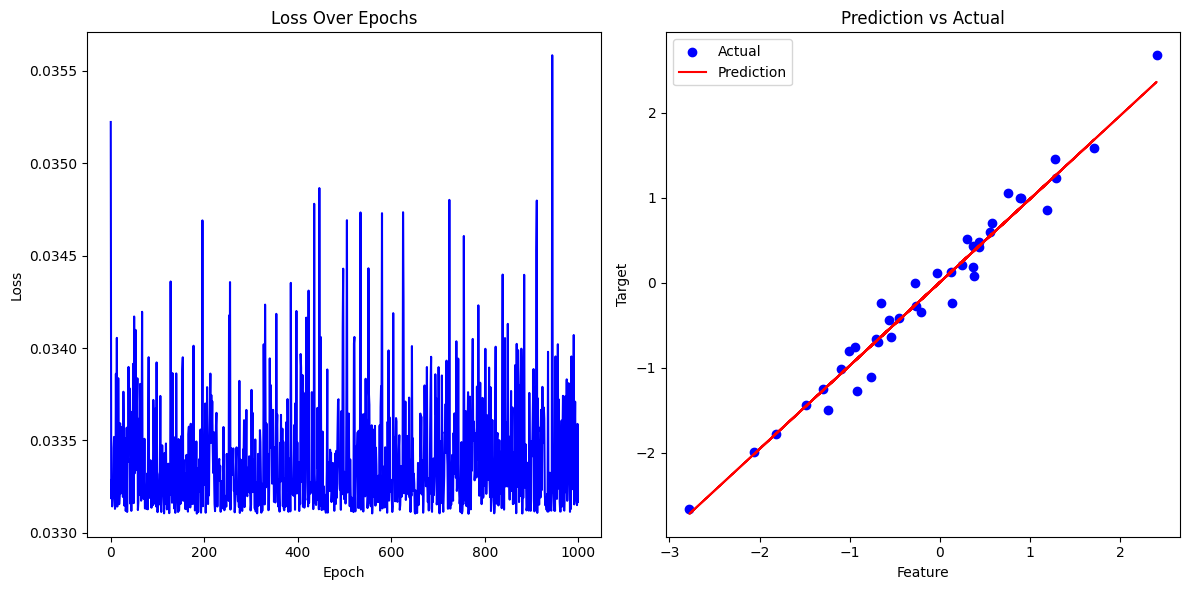

In [25]:
plt.figure(figsize=(12, 6))

# Loss history plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, color='blue')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, w * X_test + b, color='red', label='Prediction')
plt.title("Prediction vs Actual")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.tight_layout()
plt.show()